# Student Success and Failure Lookalike Project

School is one of the best ways to raise individuals' earnings potentials. If we can identify students who are at risk in school, it's possible we could intervene beforehand. If we can identify "lookalike's" of students that fail, we could intervene with these students and tailor solutions based on identifiers.

_"A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes._

_Data Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success_

This dataset was provided by the Polytechnic Institute of Portalegre and SATDAP - Capacitação da Administração Pública.

Citation: M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

Note: While this group certainly did their own prediction, I have not and will not read the paper until after I complete my own data model.

<div style="margin-left: 50px;">
    <img src="./poly_screenshot.png" width="600" />
</div>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pulling in the data for an initial first pass
datapath = './data/student_data.csv'
raw_df = pd.read_csv(datapath, low_memory=False, delimiter=';')
print(raw_df.shape)
display(raw_df.head())
display(raw_df.info())

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(raw_df['Target'])
target_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Target Column Conversion: {target_map}")

def target_mapping(x):
    y = target_map[x]
    return(y)

raw_df["Target"] = raw_df["Target"].apply(target_mapping)
display(raw_df.head())

dist_of_targ = raw_df.reset_index()[['Target','index']].groupby('Target').count().reset_index()
dist_of_targ['percent'] = dist_of_targ['index'].div(dist_of_targ['index'].sum())
display(dist_of_targ)

Target Column Conversion: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


,Target,index,percent
0,0,1421,0.321203
1,1,794,0.179476
2,2,2209,0.499322


In [4]:
from utilWidgets import utilWidgets

# A plotting function that we'll use shortly
def HistAndBar(data, column, target="Target"):
    #warnings.simplefilter("ignore", category=UserWarning)
    fig, axes = plt.subplots(1,2, figsize=(7,4))
    sns.histplot(data=data, x=column, ax=axes[0])
    axes[0].set_title(f"Hist: {column}")
    sns.countplot(data=data, x=column, hue=target, ax=axes[1])
    axes[1].set_title(f"Bar: {column} and {target}")
    plt.show()
    
    # Now, show the widgets for marking the distribution
    #markings = utilWidgets().mark_distribution(column=column, data=data).distribution_choices
    #display(markings)
    #return(markings)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


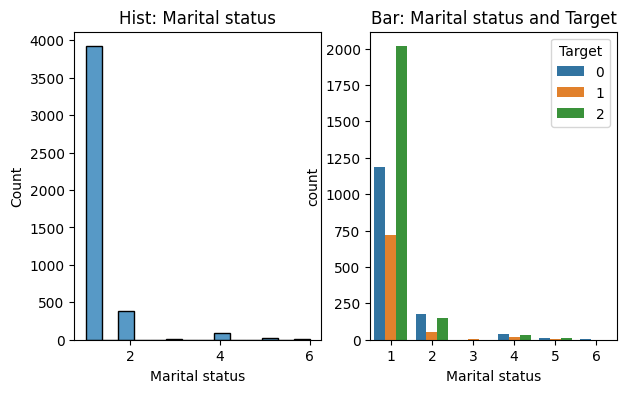

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


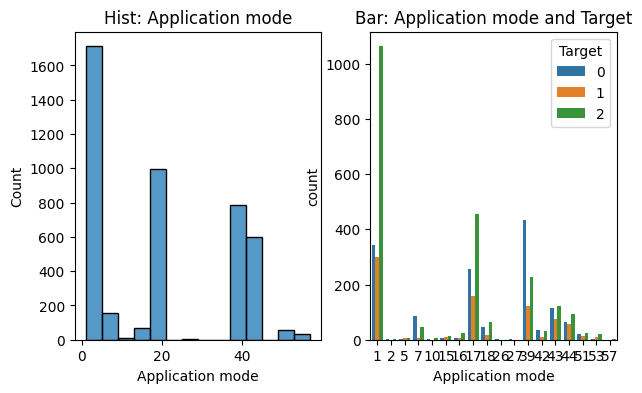

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


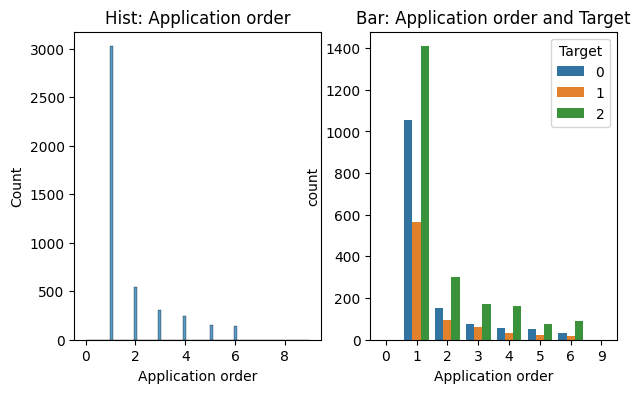

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


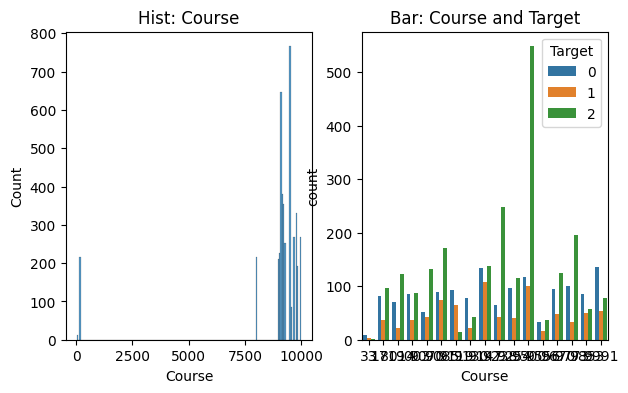

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


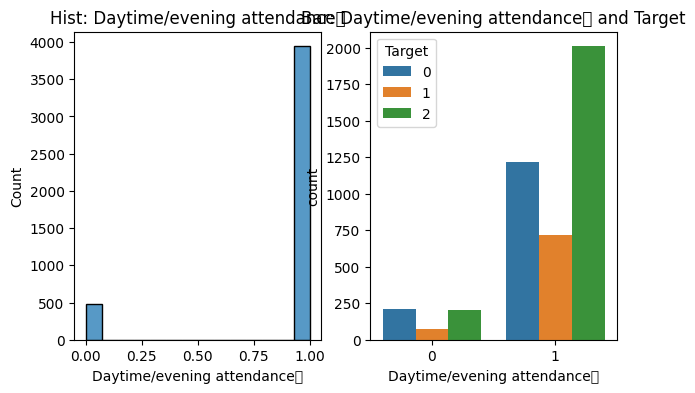

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


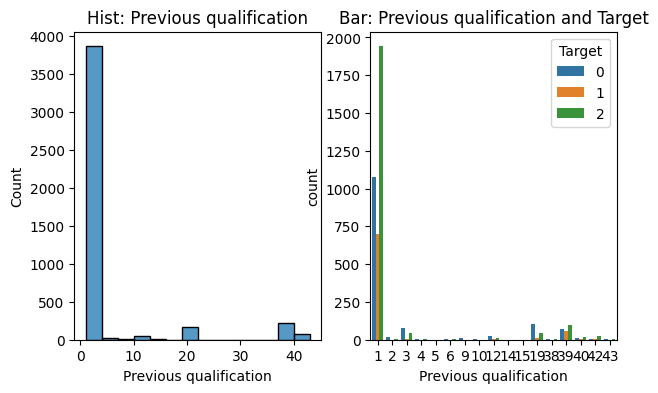

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


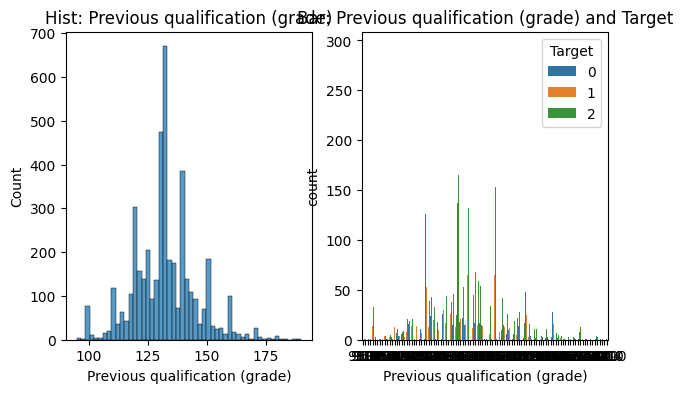

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


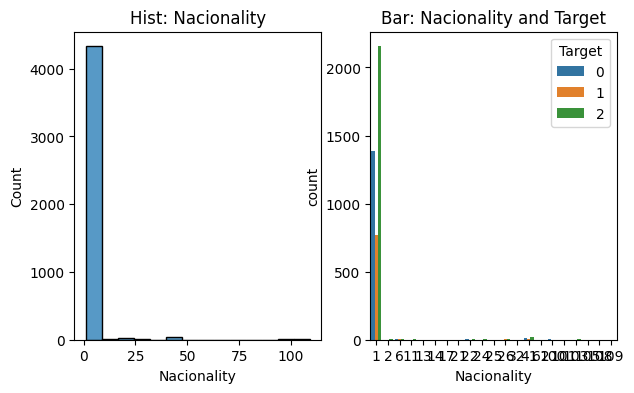

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


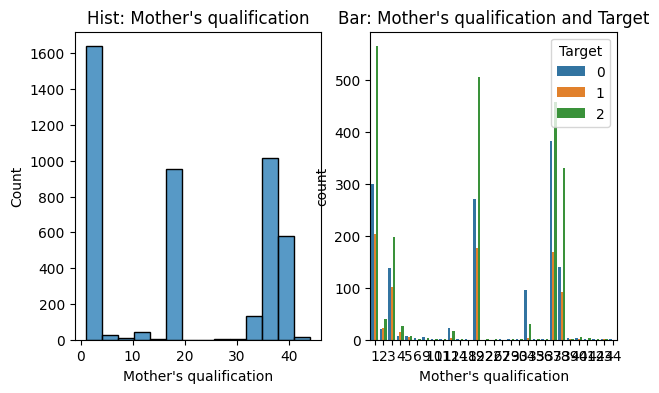

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


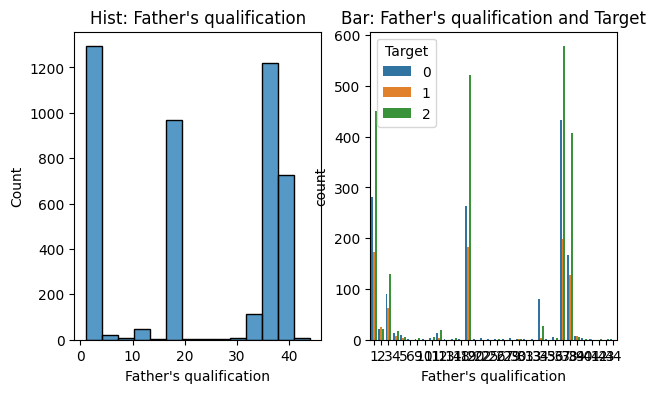

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


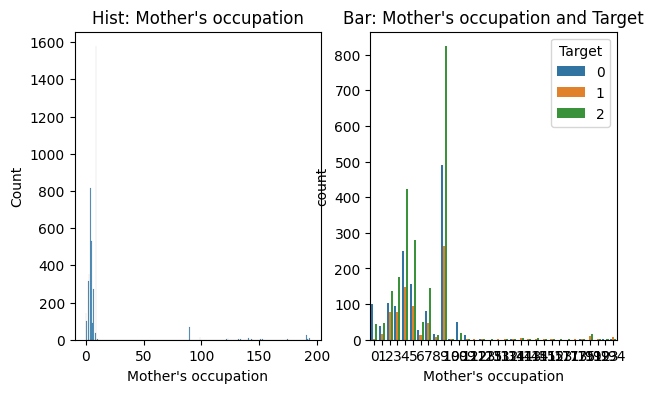

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


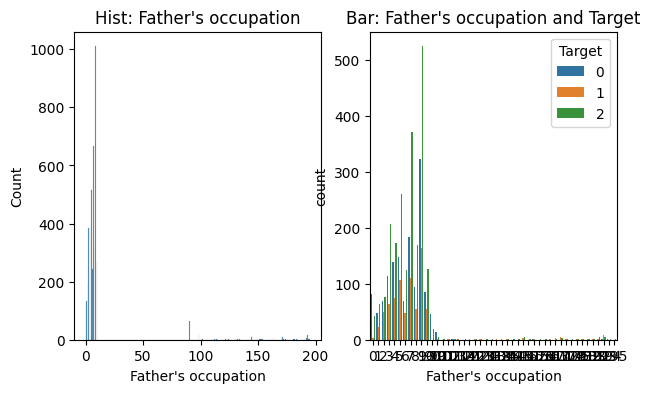

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


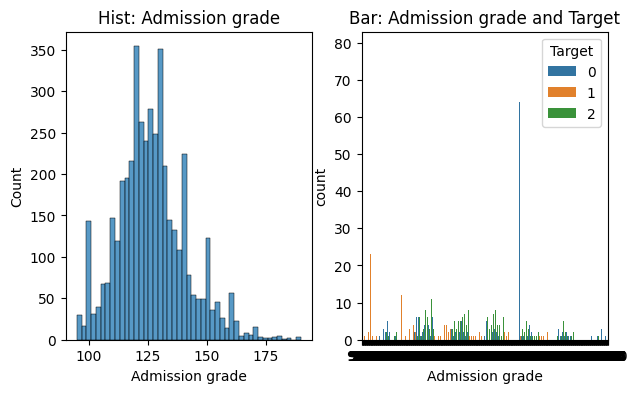

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


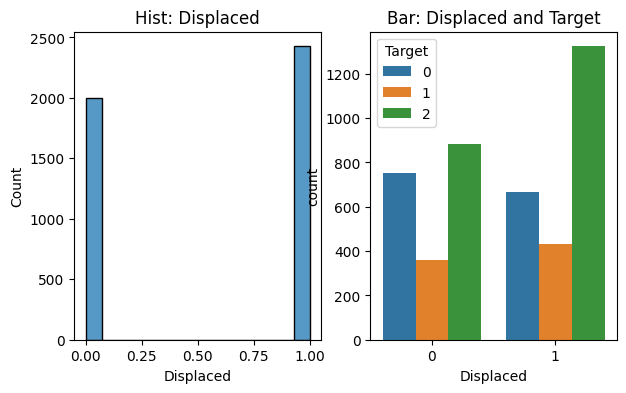

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


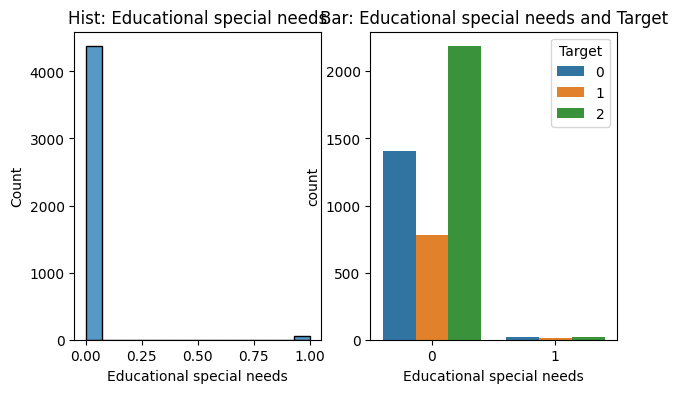

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


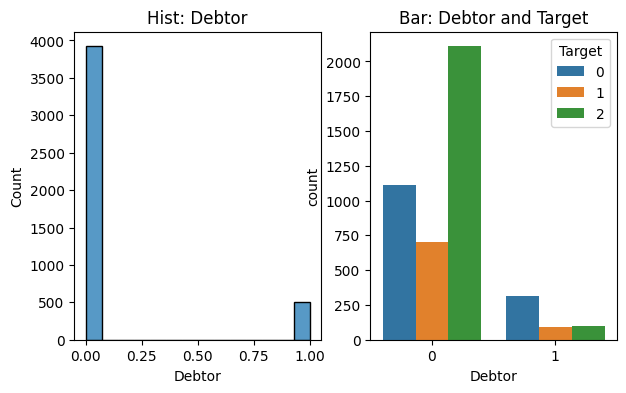

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


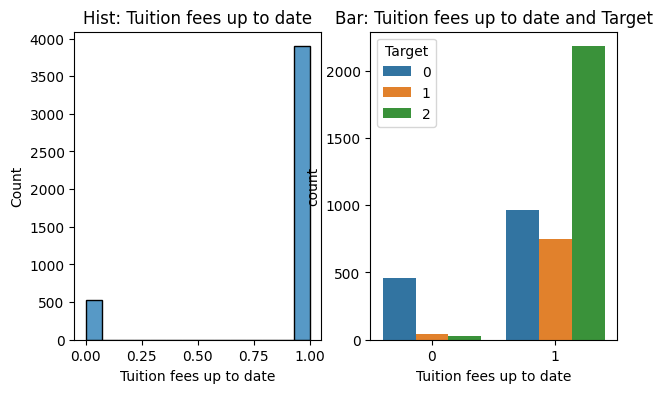

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


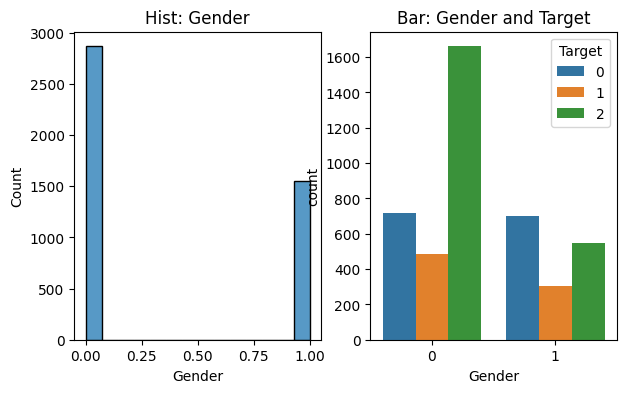

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


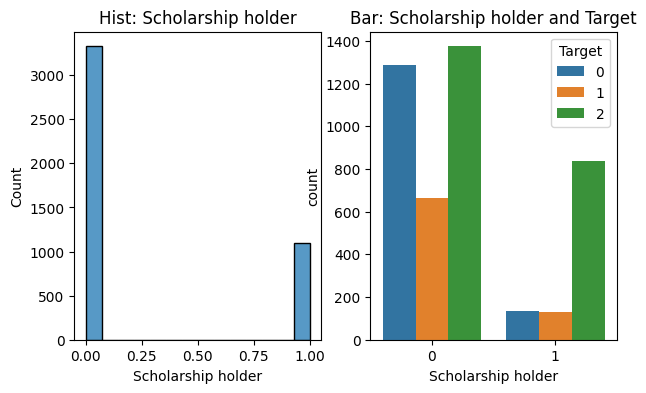

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


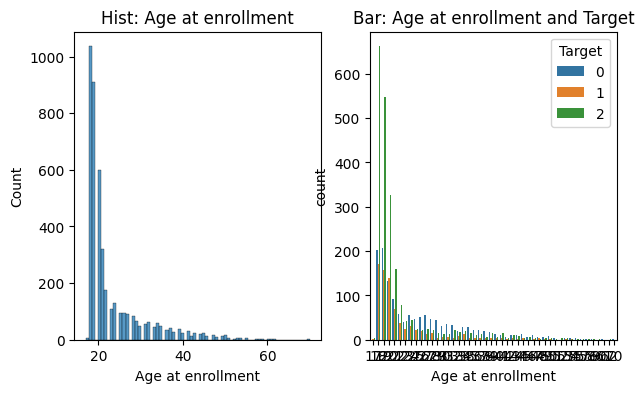

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


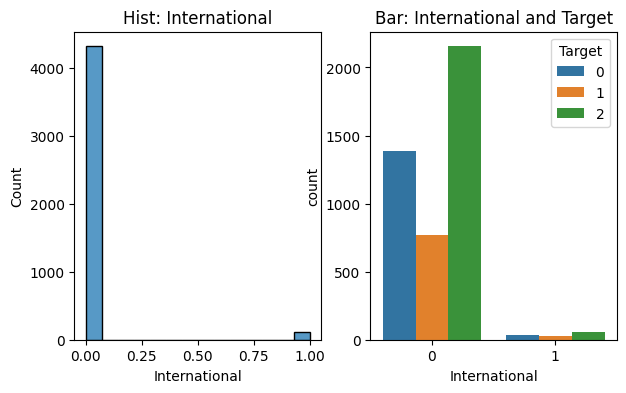

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


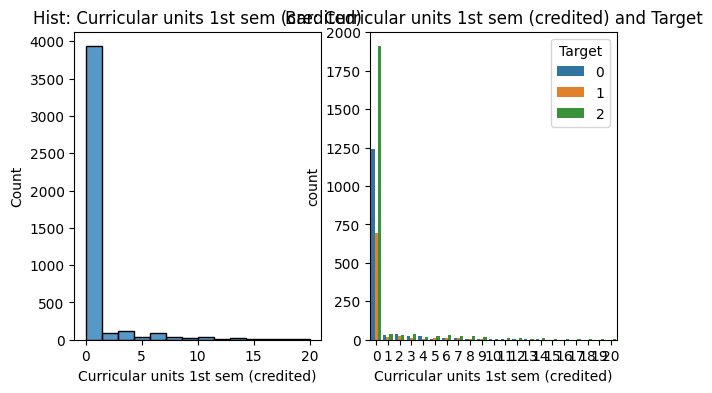

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


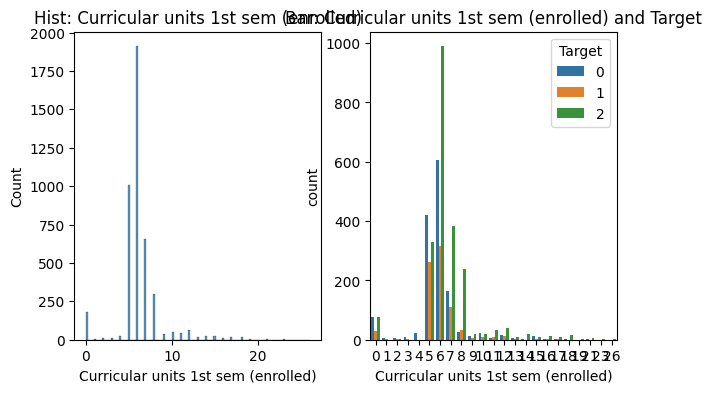

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


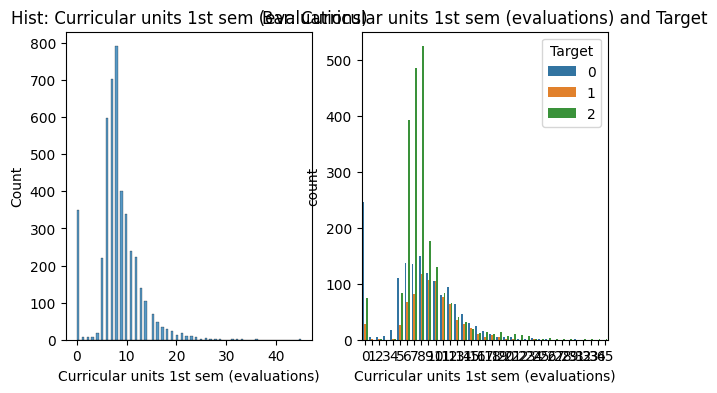

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


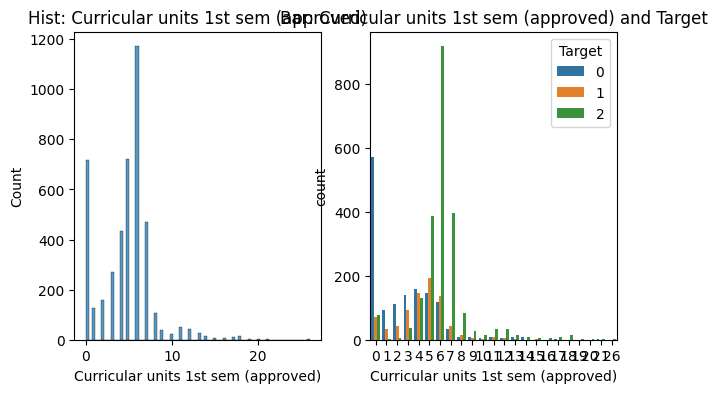

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


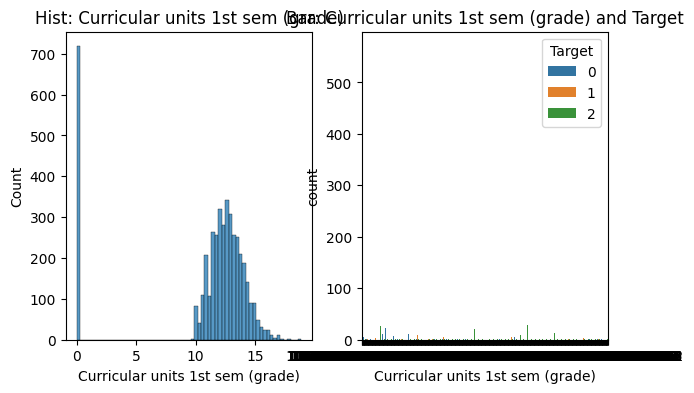

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


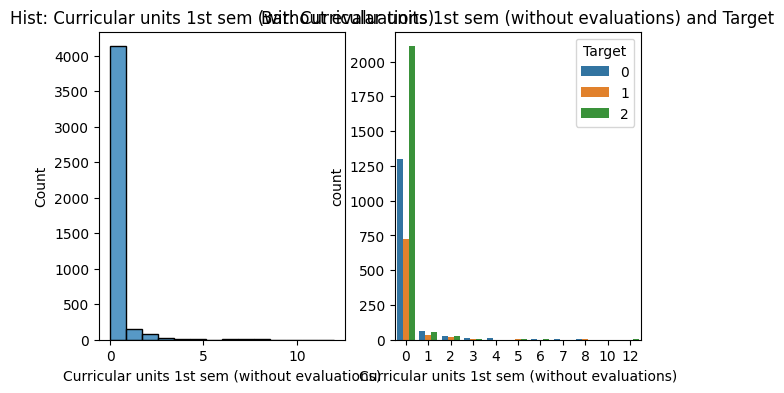

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


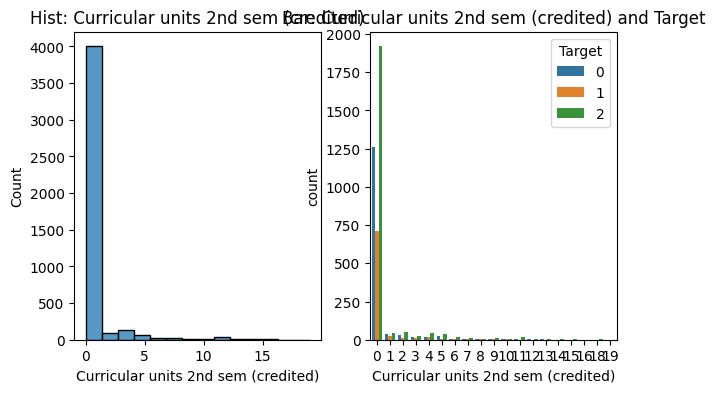

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


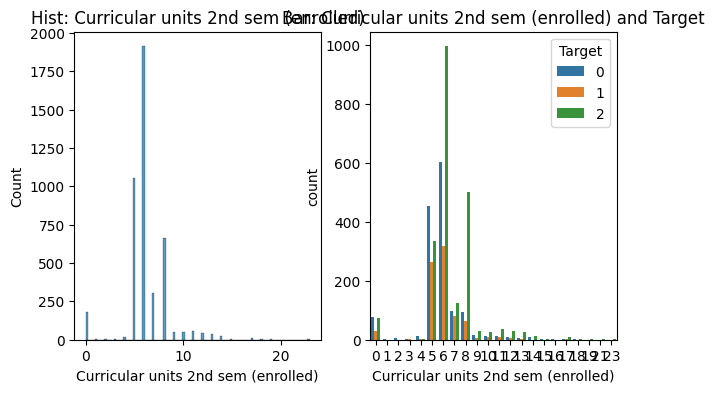

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


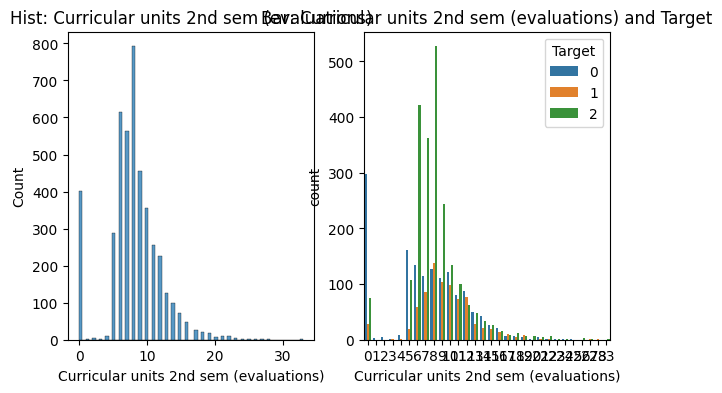

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


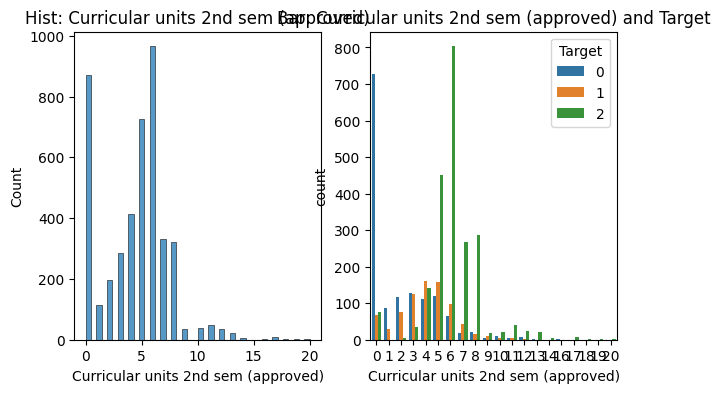

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


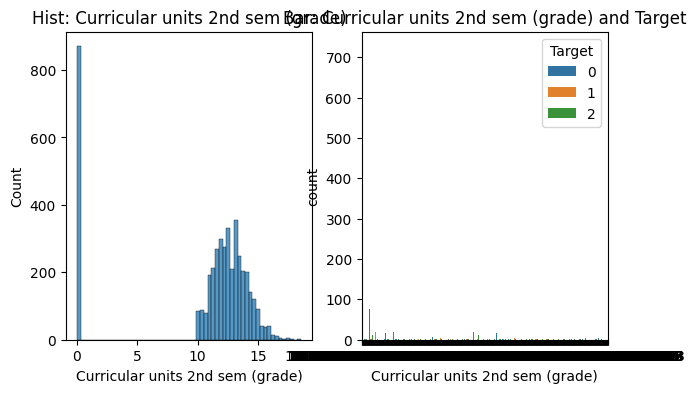

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


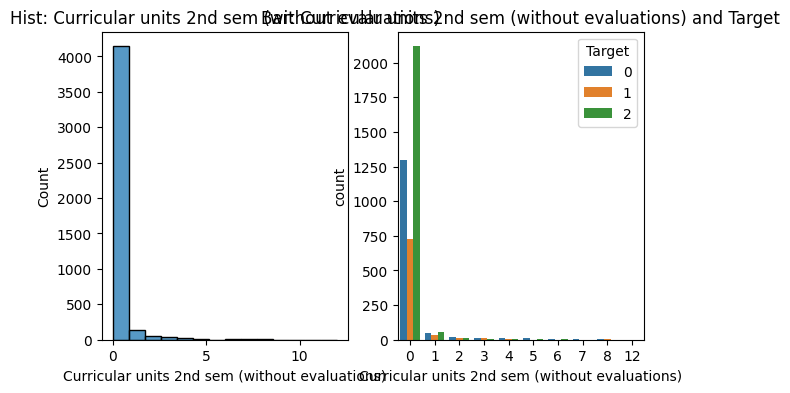

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


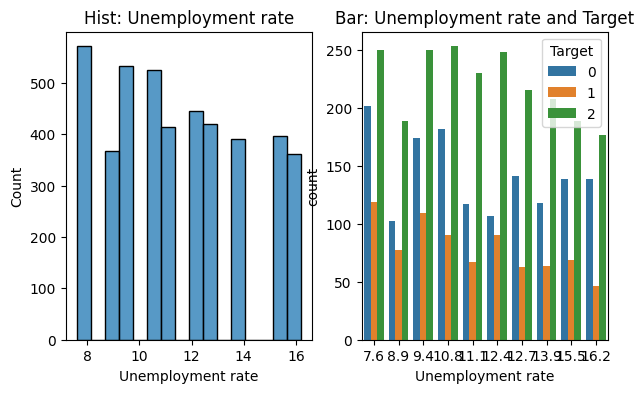

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


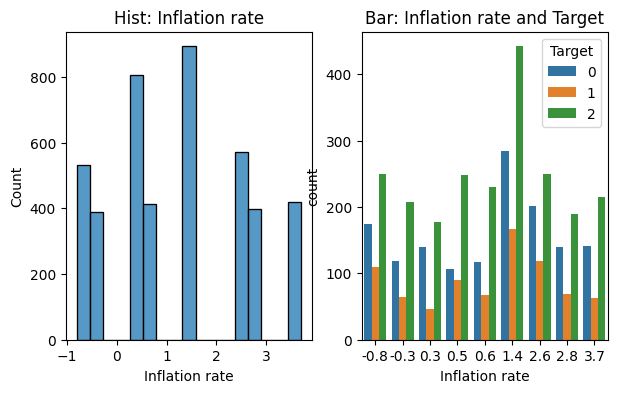

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


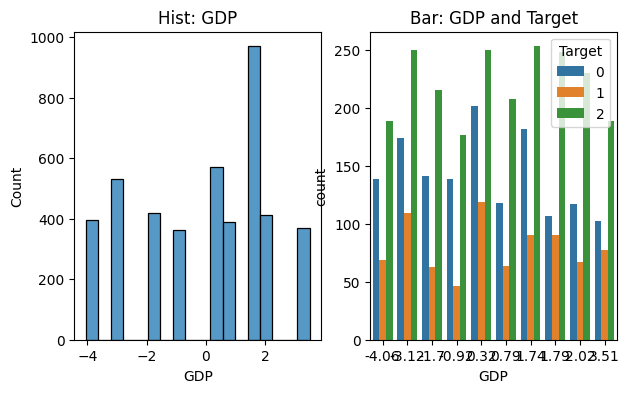

In [28]:
#Looking for interesting callouts
calls = {}
for c in list(raw_df.columns[:-1]):
    calls[c] = {'blanks':{}, 'distribution':{}}
    #blank rows
    count_blanks = raw_df[(raw_df[c].isna() | raw_df[c]=='')].shape[0]
    calls[c]['blanks'] = count_blanks
    #hists
    pair_df = raw_df[[c,'Target']]
    #calls[c]['distribution'] = HistAndBar(pair_df, column=c)[c]
    HistAndBar(pair_df, column=c)
    #plt.show()
    

Fitting 5 folds for each of 1 candidates, totalling 5 fits
RMSE: 0.6718406529927305
Accuracy Score: 0.7664383561643836


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


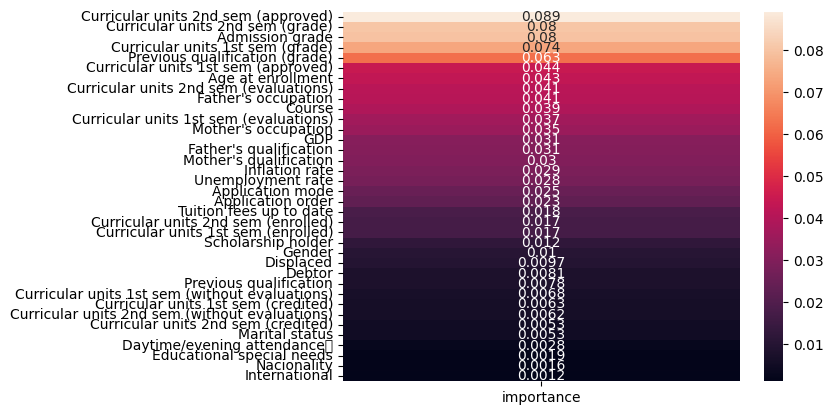

Fitting 5 folds for each of 48 candidates, totalling 240 fits
RMSE: 0.6329967863321656
Accuracy Score: 0.7801369863013699


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


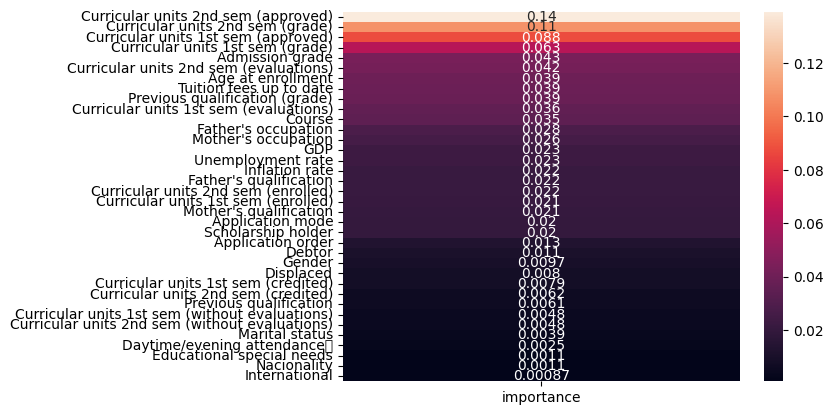

In [7]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Local packageZZZ
from utilClassifier import Classifier

clean_df = raw_df.copy()
y = 'Target'
xlist = [x for x in list(clean_df.columns) if x != y] 

##W/O Normalization
#Gradient Boosting
gparams = {
    'n_estimators':[250],#[100, 250, 500, 1000],
    'max_depth': [20],#[1, 10, 20],
    'subsample':[0.25],#[0.25,0.5,0.8],
    'max_features':[0.5]#[0.25, 0.5, 0.8]
}
gb_class = Classifier(data=clean_df, X=xlist, y=y, 
                      estimator=GradientBoostingClassifier, 
                      gparams_dict=gparams,
                      normalize = False)
gb_class = gb_class.fitModel().showMetrics()
gb_class = gb_class.showFeatureImportance()

#RFC
rfparams = {
    "n_estimators":[10,50,100,200],
    "max_depth":[1,5,10,20],#,50,100],
    "min_samples_split":[2,5,10]
}
rf_class = Classifier(data=clean_df, X=xlist, y=y, 
                      estimator=RandomForestClassifier, gparams_dict=rfparams,
                      normalize = False)

rf_class = rf_class.fitModel().showMetrics()
rf_class = rf_class.showFeatureImportance()

In [27]:
# Get the incorrect predictions with the lowest confidence in their true class
misses = [(i, rf_class.y_test.iloc[i], rf_class.y_preds[i], rf_class.y_proba[i].max()) for i in rf_class.misclassified_idx]

dist_misses = [i[1] for i in misses]

zero = 0
one = 0
two = 0

for m in dist_misses:
    if m == 0:
        zero+=1
    if m == 1:
        one += 1
    if m ==2:
        two += 1

print(zero)
print(zero/(zero+one+two))
print(one)
print(one/(zero+one+two))
print(two)
print(two/(zero+one+two))

least_conf_misses = sorted(misses, key=lambda x: x[3])[:10]  # Least confident misses
highest_conf_misses = sorted(misses, key=lambda x: x[3])[-10:]  # Highest confident misses


for i, true_label, pred_label, confidence in least_conf_misses:
    print(f"Low-Conf -- Index: {i}, True: {true_label}, Predicted: {pred_label}, Confidence: {confidence}")

print("\n")
for i, true_label, pred_label, confidence in highest_conf_misses:
    print(f"High-Conf -- Index: {i}, True: {true_label}, Predicted: {pred_label}, Confidence: {confidence}")

111
0.34579439252336447
165
0.514018691588785
45
0.14018691588785046
Low-Conf -- Index: 195, True: 1, Predicted: 2, Confidence: 0.00016
Low-Conf -- Index: 755, True: 1, Predicted: 2, Confidence: 0.0015144454799627214
Low-Conf -- Index: 451, True: 0, Predicted: 2, Confidence: 0.02
Low-Conf -- Index: 635, True: 1, Predicted: 2, Confidence: 0.03
Low-Conf -- Index: 148, True: 0, Predicted: 2, Confidence: 0.03016
Low-Conf -- Index: 758, True: 0, Predicted: 2, Confidence: 0.030447635135135136
Low-Conf -- Index: 374, True: 1, Predicted: 2, Confidence: 0.04
Low-Conf -- Index: 431, True: 1, Predicted: 0, Confidence: 0.04
Low-Conf -- Index: 982, True: 1, Predicted: 0, Confidence: 0.04
Low-Conf -- Index: 275, True: 0, Predicted: 2, Confidence: 0.045789518254306986


High-Conf -- Index: 636, True: 0, Predicted: 1, Confidence: 0.53
High-Conf -- Index: 1274, True: 0, Predicted: 1, Confidence: 0.53
High-Conf -- Index: 812, True: 0, Predicted: 1, Confidence: 0.5325
High-Conf -- Index: 829, True: 2, Pr

The RF model's least confident misses are for Graduates: 2's (who or either still enrolled or dropped out).

The model's most confident misses are with Enrolled: 1's (who are most frequently dropped out).
It's also more likely to get Enrolled: 1's wrong which only make up 17% of our original data, but 50% of our misses (despite stratifying the train/test split). 

Some ways to improve:
    - One possibility could be to try to train three different models to predict each target.
    - Look for features that correlate with enrolled target and try to weigh those more heavily or find more features similar to that. Engineer features that could push the model further in that regard.

In [ ]:
##With Normalization
scale_cols = [
    'Course',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (evaluations)'
]

log_cols = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (without evaluations)'
]

#Gradient Boosting
gb_class = Classifier(data=clean_df, X=xlist, y=y, 
                      estimator=GradientBoostingClassifier, 
                      gparams_dict=gparams, scale_cols=scale_cols, log_cols=log_cols,
                      normalize = True)
gb_class = gb_class.fitModel().showMetrics()
gb_class = gb_class.showFeatureImportance()

#RFC
rf_class = Classifier(data=clean_df, X=xlist, y=y, 
                      estimator=RandomForestClassifier, gparams_dict=rfparams,
                      scale_cols=scale_cols, log_cols=log_cols,
                      normalize = True)
rf_class = rf_class.fitModel().showMetrics()
rf_class = rf_class.showFeatureImportance()



In [ ]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer

clean_df = raw_df.copy()
#display(clean_df.columns)
#Standardize Features
scaler = StandardScaler()
scale_cols = [
    'Course',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (evaluations)'
]

clean_df[scale_cols] = scaler.fit_transform(X=clean_df[scale_cols])

#Log  Transform
lg_transformer = FunctionTransformer(np.log1p, validate=True)
log_cols = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (without evaluations)'
]
clean_df[log_cols] = lg_transformer.fit_transform(X=clean_df[log_cols])

display(clean_df.head())

In [ ]:
#Make a model to explore.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, roc_auc_score, RocCurveDisplay, accuracy_score

In [ ]:
##Without Normalization/Log -- Just as is
#Assign vars
display(raw_df.head())
X = raw_df.drop("Target", inplace=False, axis=1)
y = raw_df['Target']
SD = 42

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=SD)


#Instantiate GBC
est = GradientBoostingClassifier(random_state=SD)

#Create Grid Search Params
gparams = {
    'n_estimators':[250],#[100, 250, 500, 1000],
    'max_depth': [20],#[1, 10, 20],
    'subsample':[0.25],#[0.25,0.5,0.8],
    'max_features':[0.5]#[0.25, 0.5, 0.8]
}

gscv = GridSearchCV(est, param_grid=gparams, scoring="neg_mean_squared_error",cv=5, verbose=True)
gscv.fit(X_train, y_train)

print(gscv.best_estimator_)
y_preds = gscv.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_preds)**(1/2)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")

In [ ]:
##Without Normalization/Log -- Just as is
rf = RandomForestClassifier(random_state=SD)
gparams = {
    "n_estimators":[10,50,100,200],
    "max_depth":[1,5,10,20],#,50,100],
    "min_samples_split":[2,5,10]
}

gs = GridSearchCV(estimator=rf, param_grid=gparams, scoring="neg_mean_squared_error",cv=5, verbose=True)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
y_preds = gs.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_preds)**(1/2)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")

In [ ]:
##With Normalization and Log normalization
#Assign vars
display(clean_df.head())
X = clean_df.drop("Target", inplace=False, axis=1)
y = clean_df['Target']
SD = 42

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=SD)


#Instantiate GBC
est = GradientBoostingClassifier(random_state=SD)

#Create Grid Search Params
gparams = {
    'n_estimators':[250],#[100, 250, 500, 1000],
    'max_depth': [20],#[1, 10, 20],
    'subsample':[0.25],#[0.25,0.5,0.8],
    'max_features':[0.5]#[0.25, 0.5, 0.8]
}

gscv = GridSearchCV(est, param_grid=gparams, scoring="neg_mean_squared_error",cv=5, verbose=True)
gscv.fit(X_train, y_train)

print(gscv.best_estimator_)
y_preds = gscv.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_preds)**(1/2)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")

In [ ]:
rf = RandomForestClassifier(random_state=SD)
gparams = {
    "n_estimators":[10,50,100,200],
    "max_depth":[1,5,10,20],#,50,100],
    "min_samples_split":[2,5,10]
}

gs = GridSearchCV(estimator=rf, param_grid=gparams, scoring="neg_mean_squared_error",cv=5, verbose=True)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
y_preds = gs.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_preds)**(1/2)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")

In [ ]:
#print(gs.best_params_)
rf = gs.best_estimator_
features = dict(zip(list(clean_df.columns[:-1]), rf.feature_importances_))
features = pd.DataFrame(pd.Series(features))
features.columns = ['importance']
features = features.sort_values(by='importance', ascending=False)
#display(features)

ax = sns.heatmap(features, annot=True)
ax.set_yticks(np.arange(len(features)) + 0.5)
ax.set_yticklabels(features.index, rotation=0)
plt.show()

In [ ]:
from utilClassifier import Classifier

clss = Classifier(data=